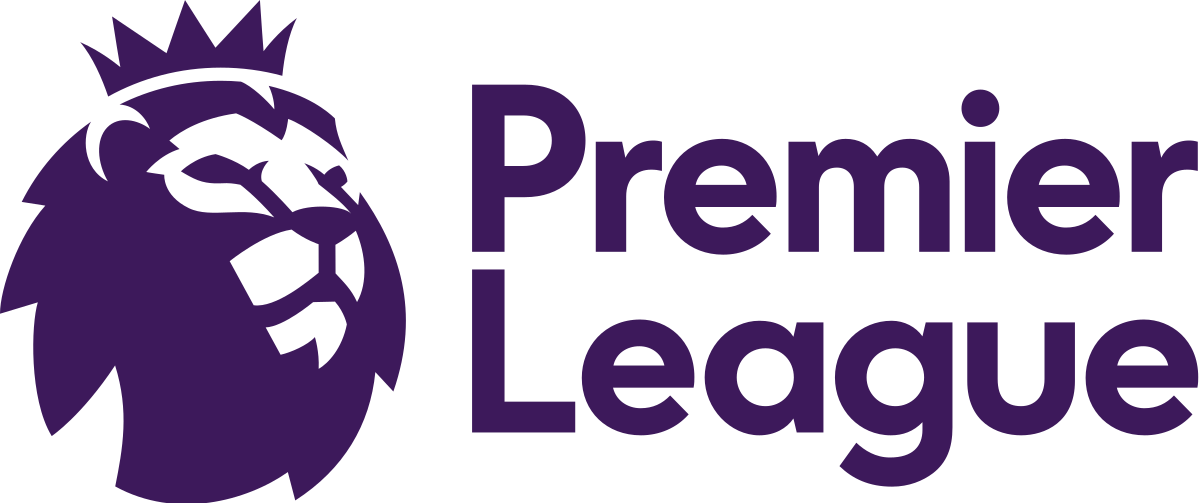

In [1]:
# Import the libraries that will be used
from urllib.request import urlopen   # handles the request to a web site
from bs4 import BeautifulSoup        # handles the parsing of the data
import pandas as pd                 # Put it in a data frame for manipulation



In [2]:
%%html
<iframe src="https://www.bbc.com/sport/football/premier-league/table" width="1000" height="500"></iframe>

In [3]:
# URL page we will scraping
url = "https://www.bbc.com/sport/football/premier-league/table"

# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")

#############################
# Inspect the Data retrieved
##############################

#  use findALL() to get the 2 fisrt columns of our table
tr = soup.findAll('tr', limit=2)   # The  limit param tells the method to limit the results to 2 table rows (tr)

#Lets inspect the type and lenght of the object
print("type:", type(tr), "len:", len(tr))

# Lets print the results
tr


type: <class 'bs4.element.ResultSet'> len: 2


[<tr class="" data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0"><th class="gs-o-table__cell gs-o-table__cell--bold" data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-0"><span class="" data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-0.0"></span></th><th class="gs-o-table__cell gs-o-table__cell--bold gs-o-table-cell " data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-1"></th><th class="gs-o-table__cell gs-o-table__cell--bold gs-o-table-cell gs-o-table__cell--bold gs-o-table__cell--left" data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-2">Team</th><th class="gs-o-table__cell gs-o-table__cell--bold gs-o-table__cell gs-o-table__cell--bold gs-o-table__cell--right " data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-3"><abbr class="sp-u-abbr-on sp-u-abbr-off@m" data-reactid=".2ftxsmee6tc.2.0.0.0.0.1.$competition-table-0.0.$row-0.$th-3.0" title="Played"><span

In [19]:
tr = soup.findAll('tr', limit=1)

# use getText()to extract the text we need into a list
# First search all the 'th' tags inside the 'tr'.
# Since the tr is like a list we need to pass the index of the 'list' tr[0]
headers = [th.getText() for th in tr[0].findAll('th')]

headers

['', '', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts', 'Form']

In [119]:
# Give a name to the empty headers
headers[0]="Rank"
headers[1]="drop"

# avoid the first header row
rows = soup.findAll('tr')[1:]
team_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

team_stats[1]

['2',
 "team hasn't moved",
 'Liverpool',
 '38',
 '30',
 '7',
 '1',
 '89',
 '22',
 '67',
 '97',
 'WWon 2 - 0 against Chelsea on April 14th 2019.WWon 2 - 0 against Cardiff City on April 21st 2019.WWon 5 - 0 against Huddersfield Town on April 26th 2019.WWon 3 - 2 against Newcastle United on May 4th 2019.WWon 2 - 0 against Wolverhampton Wanderers on May 12th 2019.']

In [131]:
premier_table_df = pd.DataFrame(team_stats, columns = headers)
premier_table_df.head(10)

,Rank,drop,Team,P,W,D,L,F,A,GD,Pts,Form
0,1,team hasn't moved,Man City,38,32,2,4,95,23,72,98,WWon 1 - 0 against Tottenham Hotspur on April ...
1,2,team hasn't moved,Liverpool,38,30,7,1,89,22,67,97,WWon 2 - 0 against Chelsea on April 14th 2019....
2,3,team hasn't moved,Chelsea,38,21,9,8,63,39,24,72,LLost 0 - 2 against Liverpool on April 14th 20...
3,4,team hasn't moved,Tottenham,38,23,2,13,67,39,28,71,LLost 0 - 1 against Manchester City on April 2...
4,5,team hasn't moved,Arsenal,38,21,7,10,73,51,22,70,LLost 2 - 3 against Crystal Palace on April 21...
5,6,team hasn't moved,Man Utd,38,19,9,10,65,54,11,66,LLost 0 - 4 against Everton on April 21st 2019...
6,7,team hasn't moved,Wolves,38,16,9,13,47,46,1,57,DDrew 0 - 0 against Brighton & Hove Albion on ...
7,8,team hasn't moved,Everton,38,15,9,14,54,46,8,54,LLost 0 - 2 against Fulham on April 13th 2019....
8,9,team hasn't moved,Leicester,38,15,7,16,51,48,3,52,LLost 0 - 1 against Newcastle United on April ...
9,10,team hasn't moved,West Ham,38,15,7,16,52,55,-3,52,LLost 1 - 2 against Manchester United on April...


In [132]:
#Let's check the columns
premier_table_df.columns


Index(['Rank', 'drop', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts',
       'Form'],
      dtype='object')

In [133]:
# The column drop is useless, so let's drop the drop :)
premier_table_df.drop(['drop'], axis=1, inplace=True)
premier_table_df.head()

,Rank,Team,P,W,D,L,F,A,GD,Pts,Form
0,1,Man City,38,32,2,4,95,23,72,98,WWon 1 - 0 against Tottenham Hotspur on April ...
1,2,Liverpool,38,30,7,1,89,22,67,97,WWon 2 - 0 against Chelsea on April 14th 2019....
2,3,Chelsea,38,21,9,8,63,39,24,72,LLost 0 - 2 against Liverpool on April 14th 20...
3,4,Tottenham,38,23,2,13,67,39,28,71,LLost 0 - 1 against Manchester City on April 2...
4,5,Arsenal,38,21,7,10,73,51,22,70,LLost 2 - 3 against Crystal Palace on April 21...


In [134]:
# check the number of rows in out table
premier_table_df.shape

(21, 11)

##### OPS!!!
##### There are only 20 teams in the CL but I have 21 rows. I know that the problem is not at the top, since I already inspected the table, let's look at the bottom of the table

In [135]:
premier_table_df.tail()

,Rank,Team,P,W,D,L,F,A,GD,Pts,Form
16,17,Brighton,38,9,9,20,35,60,-25,36,DDrew 0 - 0 against Wolverhampton Wanderers on...
17,18,Cardiff,38,10,4,24,34,69,-35,34,WWon 2 - 0 against Brighton & Hove Albion on A...
18,19,Fulham,38,7,5,26,34,81,-47,26,WWon 2 - 0 against Everton on April 13th 2019....
19,20,Huddersfield,38,3,7,28,22,76,-54,16,LLost 0 - 4 against Tottenham Hotspur on April...
20,Last updated 14th May 2019 at 22:37,None,None,None,None,None,None,None,None,None,None


In [136]:
# As you can see the bottom of the table as a problem
# Let's delete the last row

premier_table_df.drop(premier_table_df.tail(1).index, inplace=True)
premier_table_df.tail()

,Rank,Team,P,W,D,L,F,A,GD,Pts,Form
15,16,Southampton,38,9,12,17,45,65,-20,39,LLost 1 - 3 against Newcastle United on April ...
16,17,Brighton,38,9,9,20,35,60,-25,36,DDrew 0 - 0 against Wolverhampton Wanderers on...
17,18,Cardiff,38,10,4,24,34,69,-35,34,WWon 2 - 0 against Brighton & Hove Albion on A...
18,19,Fulham,38,7,5,26,34,81,-47,26,WWon 2 - 0 against Everton on April 13th 2019....
19,20,Huddersfield,38,3,7,28,22,76,-54,16,LLost 0 - 4 against Tottenham Hotspur on April...


In [137]:
# Let's use what we learned in the last course to make some descriptive analysis of the data
# Get a summary of the datasets
def summary(df):
    # Identify the Data Types
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])

    # Identify the unique values
    s_df['Nunique'] = df.nunique()

    # Identify the Missing values
    s_df['MissingValues'] = df.isnull().sum()

    # Identify the count for each variable
    s_df['Count'] = df.count()

    # Identify the zero values for each variable
    s_df['ZeroValues'] = (df == 0).sum()

    print(s_df)
    
summary(premier_table_df)

       Dtype  Nunique  MissingValues  Count  ZeroValues
Rank  object       20              0     20           0
Team  object       20              0     20           0
P     object        1              0     20           0
W     object       15              0     20           0
D     object        8              0     20           0
L     object       13              0     20           0
F     object       16              0     20           0
A     object       17              0     20           0
GD    object       20              0     20           0
Pts   object       18              0     20           0
Form  object       20              0     20           0


** As you can see above some of the numerical  values are actually strings. Since we want to use them to calculate some stats we need to convert them to float **

In [168]:
premier_table_df[['Rank','P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']] = premier_table_df[['Rank','P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']].apply(pd.to_numeric, errors='coerce')

summary(premier_table_df)

                       Dtype  Nunique  MissingValues  Count  ZeroValues
Rank                   int64       20              0     20           0
Team                  object       20              0     20           0
P                      int64        1              0     20           0
W                      int64       15              0     20           0
D                      int64        8              0     20           0
L                      int64       13              0     20           0
F                      int64       16              0     20           0
A                      int64       17              0     20           0
Goal ratio           float64       15              0     20           0
GD                     int64       20              0     20           0
Pts                    int64       18              0     20           0
Form                  object       20              0     20           0
Goals/game           float64       12              0     20     

##### Now that we retreived, cleaned and checked the quality of our data, let's have some fun with it. 
I would like to calculate what's the goal ratio of each team, this is the number of goals scored (F) divided by the number of goals conceded (A).

In [139]:
# Divide the column F by A and round to 1 decimal place
premier_table_df['Goal ratio'] = round(premier_table_df['F'] / premier_table_df['A'], 1)
premier_table_df.head()

,Rank,Team,P,W,D,L,F,A,GD,Pts,Form,Goal ratio
0,1,Man City,38,32,2,4,95,23,72,98,WWon 1 - 0 against Tottenham Hotspur on April ...,4.1
1,2,Liverpool,38,30,7,1,89,22,67,97,WWon 2 - 0 against Chelsea on April 14th 2019....,4.0
2,3,Chelsea,38,21,9,8,63,39,24,72,LLost 0 - 2 against Liverpool on April 14th 20...,1.6
3,4,Tottenham,38,23,2,13,67,39,28,71,LLost 0 - 1 against Manchester City on April 2...,1.7
4,5,Arsenal,38,21,7,10,73,51,22,70,LLost 2 - 3 against Crystal Palace on April 21...,1.4


In [140]:
premier_table_df.columns

Index(['Rank', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts', 'Form',
       'Goal ratio'],
      dtype='object')

In [141]:
# We can rearrange the  columns to facilitate our analysis
premier_table_df = premier_table_df[['Rank', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'Goal ratio','GD', 'Pts', 'Form']]
premier_table_df.head()

,Rank,Team,P,W,D,L,F,A,Goal ratio,GD,Pts,Form
0,1,Man City,38,32,2,4,95,23,4.1,72,98,WWon 1 - 0 against Tottenham Hotspur on April ...
1,2,Liverpool,38,30,7,1,89,22,4.0,67,97,WWon 2 - 0 against Chelsea on April 14th 2019....
2,3,Chelsea,38,21,9,8,63,39,1.6,24,72,LLost 0 - 2 against Liverpool on April 14th 20...
3,4,Tottenham,38,23,2,13,67,39,1.7,28,71,LLost 0 - 1 against Manchester City on April 2...
4,5,Arsenal,38,21,7,10,73,51,1.4,22,70,LLost 2 - 3 against Crystal Palace on April 21...


In [153]:
# If the table was big or if the script is part of a bigger 
# automated system knowing the max and min number of Games
# Of each team would be useful

team_max_games = premier_table_df.loc[premier_table_df['P'].idxmax()]
team_min_games = premier_table_df.loc[premier_table_df['P'].idxmin()]


print('The team with the max game is', team_max_games['Team'], 'with total of' , team_max_games['P'], 'games')
print('The team with the min game is', team_min_games['Team'], 'with total of' , team_min_games['P'], 'games')

The team with the max game is Man City with total of 38 games
The team with the min game is Man City with total of 38 games


In [154]:
# Let's get some stats
premier_table_df.describe()

,P,W,D,L,F,A,Goal ratio,GD,Pts
count,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,1.250000,0.000000,53.450000
std,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,1.025209,32.371202,21.007455
min,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,0.300000,-54.000000,16.000000
25%,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,0.700000,-20.750000,39.750000
50%,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,0.950000,-2.500000,51.000000
75%,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,1.250000,13.750000,67.000000
max,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,4.100000,72.000000,98.000000


In [157]:
# Now let's see which teams have Drawn more than the average
premier_table_df[( premier_table_df.D > 7.1 )]

,Rank,Team,P,W,D,L,F,A,Goal ratio,GD,Pts,Form
2,3,Chelsea,38,21,9,8,63,39,1.6,24,72,LLost 0 - 2 against Liverpool on April 14th 20...
5,6,Man Utd,38,19,9,10,65,54,1.2,11,66,LLost 0 - 4 against Everton on April 21st 2019...
6,7,Wolves,38,16,9,13,47,46,1.0,1,57,DDrew 0 - 0 against Brighton & Hove Albion on ...
7,8,Everton,38,15,9,14,54,46,1.2,8,54,LLost 0 - 2 against Fulham on April 13th 2019....
10,11,Watford,38,14,8,16,52,59,0.9,-7,50,WWon 2 - 1 against Huddersfield Town on April ...
12,13,Newcastle,38,12,9,17,42,48,0.9,-6,45,WWon 1 - 0 against Leicester City on April 12t...
15,16,Southampton,38,9,12,17,45,65,0.7,-20,39,LLost 1 - 3 against Newcastle United on April ...
16,17,Brighton,38,9,9,20,35,60,0.6,-25,36,DDrew 0 - 0 against Wolverhampton Wanderers on...


In [158]:
# Let's add some more fun columns to the table
# Fisrt goals per game 
premier_table_df['Goals/game'] = round((premier_table_df.F/premier_table_df.P), 1)

# goals Against per game
premier_table_df['Goals_conceded/game'] = round((premier_table_df['A']/premier_table_df['P']), 1)

# Now let's sort the table for goals per game and goals ratio
premier_table_df.sort_values(['Goals/game', 'Goal ratio'])


,Rank,Team,P,W,D,L,F,A,Goal ratio,GD,Pts,Form,Goals/game,Goals_conceded/game
19,20,Huddersfield,38,3,7,28,22,76,0.3,-54,16,LLost 0 - 4 against Tottenham Hotspur on April...,0.6,2.0
18,19,Fulham,38,7,5,26,34,81,0.4,-47,26,WWon 2 - 0 against Everton on April 13th 2019....,0.9,2.1
17,18,Cardiff,38,10,4,24,34,69,0.5,-35,34,WWon 2 - 0 against Brighton & Hove Albion on A...,0.9,1.8
16,17,Brighton,38,9,9,20,35,60,0.6,-25,36,DDrew 0 - 0 against Wolverhampton Wanderers on...,0.9,1.6
12,13,Newcastle,38,12,9,17,42,48,0.9,-6,45,WWon 1 - 0 against Leicester City on April 12t...,1.1,1.3
14,15,Burnley,38,11,7,20,45,68,0.7,-23,40,WWon 2 - 0 against Cardiff City on April 13th ...,1.2,1.8
15,16,Southampton,38,9,12,17,45,65,0.7,-20,39,LLost 1 - 3 against Newcastle United on April ...,1.2,1.7
6,7,Wolves,38,16,9,13,47,46,1.0,1,57,DDrew 0 - 0 against Brighton & Hove Albion on ...,1.2,1.2
11,12,Crystal Palace,38,14,7,17,51,53,1.0,-2,49,LLost 1 - 3 against Manchester City on April 1...,1.3,1.4
8,9,Leicester,38,15,7,16,51,48,1.1,3,52,LLost 0 - 1 against Newcastle United on April ...,1.3,1.3


In [159]:
premier_table_df.columns

Index(['Rank', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'Goal ratio', 'GD', 'Pts',
       'Form', 'Goals/game', 'Goals_conceded/game'],
      dtype='object')

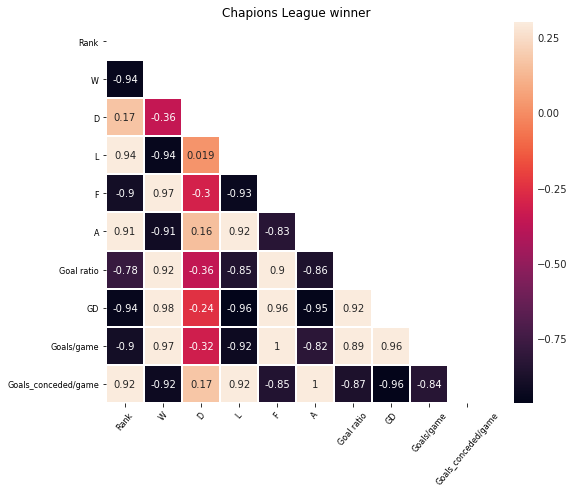

In [170]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
%matplotlib inline

def heatmap(df):

    
    fig, axes = plt.subplots(figsize=(10,7))
    
    corr = df.corr()
    
    mask = np.zeros_like(corr)
    
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(corr, linewidths=1,
                   annot=True,
                   mask=mask,
                   vmax=.3,
                   square=True)
        
        
    axes.set_title('Chapions League winner')
    plt.yticks(rotation=0, fontsize=8)
    plt.xticks(rotation=50, fontsize=8)
    plt.show()
    


df_stats = premier_table_df [['Rank', 'W', 'D', 'L', 'F', 'A', 'Goal ratio', 'GD',
       'Goals/game', 'Goals_conceded/game'] ]
heatmap(df_stats)

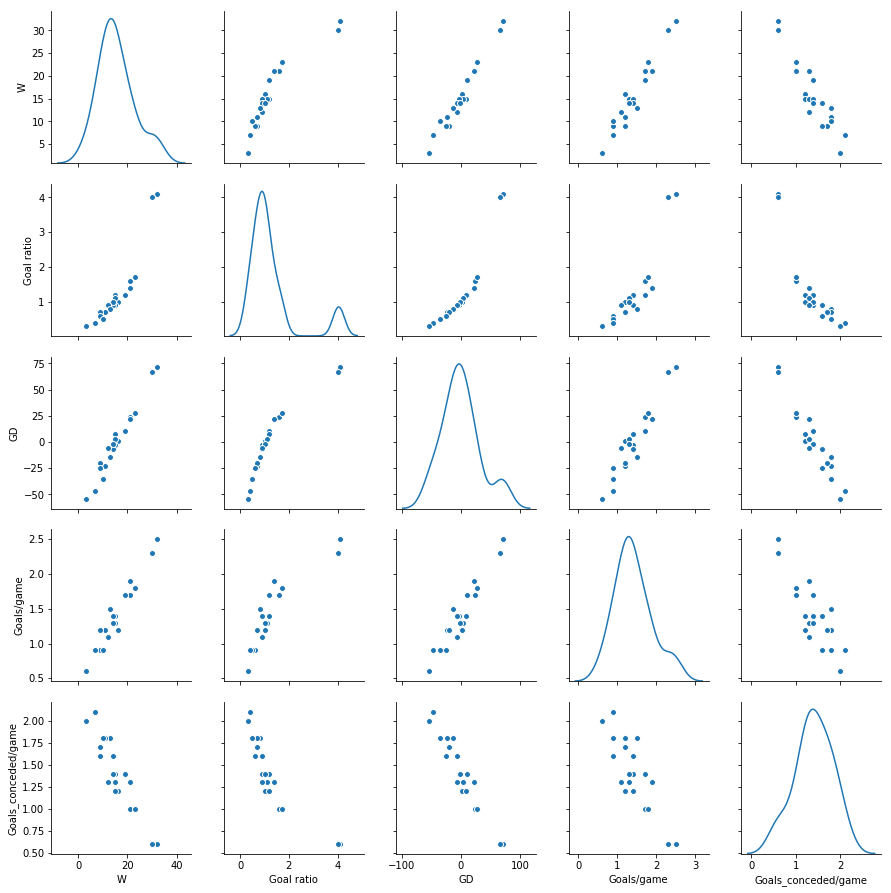

In [171]:
def pair_plot(df):
    sns.pairplot(df,diag_kind="kde")
    plt.show()

    
    
df_stats_pair = premier_table_df [['W', 'Goal ratio', 'GD',
       'Goals/game', 'Goals_conceded/game'] ]
pair_plot(df_stats_pair)